In [16]:
"""
Proyek Akhir : Klasifikasi Gambar
Andrew_Manuel96
"""

# Memanggil library
import os
import cv2
import zipfile
import numpy as np
import tensorflow as tf 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from google.colab import files 
from keras.preprocessing import image
from keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [17]:
# Download gambar dengan wget
!wget --no-check-certificate https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip -O /tmp/rockpaperscissors.zip

--2021-05-26 09:05:54--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  4.00MB/s    in 84s     

2021-05-26 09:07:18 (3.67 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [18]:
# Unzip file
extractfile = zipfile.ZipFile('/tmp/rockpaperscissors.zip', 'r')
extractfile.extractall('/tmp')
extractfile.close()

In [19]:
# Cek direktori
os.listdir('/tmp/rockpaperscissors')

['rock', 'scissors', 'paper', 'rps-cv-images', 'README_rpc-cv-images.txt']

In [20]:
# Dataset direktori
os.listdir('/tmp/rockpaperscissors/rps-cv-images')

['rock', 'scissors', 'paper', 'README_rpc-cv-images.txt']

In [21]:
# Base directory 
basedir = '/tmp/rockpaperscissors/rps-cv-images'

In [22]:
# Generate data
training_datagen = ImageDataGenerator(
                      rescale=1./255,
                      vertical_flip=True,
                      shear_range=0.2,
                      rotation_range=20,
                      validation_split=0.4,
                      fill_mode='nearest'
                   )

In [23]:
training_generator = training_datagen.flow_from_directory(
                        basedir,
                        target_size=(150,150),
                        shuffle=True,
                        subset='training',
                        color_mode='grayscale'
                      )

validation_generator = training_datagen.flow_from_directory(
                          basedir,
                          target_size=(150,150),
                          subset='validation',
                          color_mode='grayscale'
                        )

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


In [24]:
# Layer
model = tf.keras.models.Sequential([
          tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,1)),
          tf.keras.layers.MaxPooling2D(2,2),
          tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
          tf.keras.layers.MaxPooling2D(2,2),
          tf.keras.layers.Conv2D(128, (3,3,), activation='relu'),
          tf.keras.layers.MaxPooling2D(2,2),
          tf.keras.layers.Conv2D(128, (3,3,), activation='relu'),
          tf.keras.layers.MaxPooling2D(2,2),
          tf.keras.layers.Flatten(),
          tf.keras.layers.Dense(512, activation='relu'),     
          tf.keras.layers.Dense(3, activation='softmax')              
        ])

In [25]:
# Penerapan optimizer dan loss function
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy', 'mean_absolute_error']
)

In [26]:
# Early stop callback
early_stops = EarlyStopping(monitor='accuracy', mode='max', patience=3)

# Proses training
fits = model.fit(
    training_generator,
    steps_per_epoch=30,
    epochs=15,
    validation_data=validation_generator,
    validation_steps=5,
    verbose=2,
    callbacks=[early_stops]
)

Epoch 1/15
30/30 - 44s - loss: 1.1063 - accuracy: 0.3505 - mean_absolute_error: 0.4430 - val_loss: 1.0910 - val_accuracy: 0.3625 - val_mean_absolute_error: 0.4425
Epoch 2/15
30/30 - 43s - loss: 1.0268 - accuracy: 0.4849 - mean_absolute_error: 0.4217 - val_loss: 0.7752 - val_accuracy: 0.7500 - val_mean_absolute_error: 0.3351
Epoch 3/15
30/30 - 44s - loss: 0.6504 - accuracy: 0.7656 - mean_absolute_error: 0.2488 - val_loss: 0.5794 - val_accuracy: 0.8062 - val_mean_absolute_error: 0.2238
Epoch 4/15
30/30 - 43s - loss: 0.4488 - accuracy: 0.8430 - mean_absolute_error: 0.1669 - val_loss: 0.4037 - val_accuracy: 0.8250 - val_mean_absolute_error: 0.1494
Epoch 5/15
30/30 - 43s - loss: 0.3790 - accuracy: 0.8602 - mean_absolute_error: 0.1418 - val_loss: 0.2806 - val_accuracy: 0.8938 - val_mean_absolute_error: 0.0981
Epoch 6/15
30/30 - 43s - loss: 0.2499 - accuracy: 0.9108 - mean_absolute_error: 0.0971 - val_loss: 0.1619 - val_accuracy: 0.9375 - val_mean_absolute_error: 0.0612
Epoch 7/15
30/30 - 43s

In [27]:
print("Accuracy : %.2f %% \nLoss score : %.2f %%" % (fits.history['accuracy'][-1]*100, fits.history['loss'][-1]*100))

Accuracy : 97.63 % 
Loss score : 5.74 %


(0.0, 100.0)

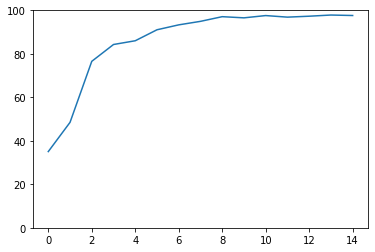

In [28]:
accuracy = [x*100 for x in fits.history['accuracy']]
plt.plot(accuracy)
plt.ylim([0,100])

In [29]:
# Label
validation_generator.class_indices

{'paper': 0, 'rock': 1, 'scissors': 2}

Saving paper.png to paper.png
Paper


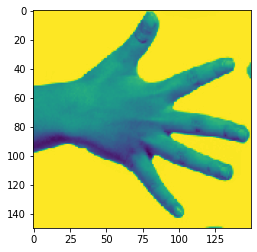

In [39]:
uploaded = files.upload()

for path in uploaded.keys():
  img = image.load_img(path, target_size=(150,150))
  img = cv2.cvtColor(np.float32(img), cv2.COLOR_RGB2GRAY)
  imgplot = plt.imshow(img)

  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = np.argmax(model.predict(images, batch_size=10), axis=-1)[0]

  if classes == 0:
    print('Paper')
  elif classes == 1:
    print('Rock')
  else:
    print('Scissor')